# Module 2 Part 1: The Machine Learning Process, a Worked Example

# Introduction

This module we will provide a practical overview of how to approach data science problems using machine learning tools.

In **Part 1**, we will cover the following:

* Establishing research goals


* Assessing methods to model data


* Exploring datasets


* Preparing data for use in machine learning models


In **Part 2**, we will introduce the process for building machine learning models.

Throughout the module, there will be exercises allowing you to build pieces of the code that will ultimately become an end-to-end machine learning process. They are intended to challenge you to gain a deeper understanding of the steps taken. Solutions for the exercises can be found at the bottom of each notebook.

This module consists of 2 parts:

- **Part 1** - The Machine Learning Process, a Worked Example (Data Exploration)

- **Part 2** - The Machine Learning Process, a Worked Example (Data Modelling)

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Learning Outcomes

In this module, you will learn and explore:

* Data cleaning and exploration with `pandas` and `seaborn`
* Data modeling with `pandas` and `scikit-learn`
* Research question formation
* Pipelines for end-to-end machine learning models

# Readings and Resources

We invite you to further supplement this notebook with the following recommended resources.

- Géron, A. (2019). Chapter 1: The Machine Learning Landscape and Chapter 2: End-to-End Machine Learning Project in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-2-Part-1:-The-Machine-Learning-Process,-a-Worked-Example" data-toc-modified-id="Module-2-Part-1:-The-Machine-Learning-Process,-a-Worked-Example">Module 2 Part 1: The Machine Learning Process, a Worked Example</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Research-Question-Formation" data-toc-modified-id="Research-Question-Formation">Research Question Formation</a></span>
<ul class="toc-item">
<li><span><a href="#Step-1:-Identify-the-problem-and-frame-hypotheses" data-toc-modified-id="Step-1:-Identify-the-problem-and-frame-hypotheses">Step 1: Identify the problem and frame hypotheses</a></span>
</li>
<li><span><a href="#Step-2:-Determine-an-appropriate-system-design" data-toc-modified-id="Step-2:-Determine-an-appropriate-system-design">Step 2: Determine an appropriate system design</a></span>
</li>
<li><span><a href="#Step-3:-Select-a-performance-metric" data-toc-modified-id="Step-3:-Select-a-performance-metric">Step 3: Select a performance metric</a></span>
</li>
</ul>
</li>
<li><span><a href="#Preparing-the-Dataset" data-toc-modified-id="Preparing-the-Dataset">Preparing the Dataset</a></span>
<ul class="toc-item">
<li><span><a href="#Reading-in-the-dataset" data-toc-modified-id="Reading-in-the-dataset">Reading in the dataset</a></span>
</li>
<li><span><a href="#EXERCISE-1:-Formulate-your-research-question" data-toc-modified-id="EXERCISE-1:-Formulate-your-research-question">EXERCISE 1: Formulate your research question</a></span>
</li>
</ul>
</li>
<li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data">Exploring the Data</a></span>
<ul class="toc-item">
<li><span><a href="#Features-(variable-names-and-data-types)" data-toc-modified-id="Features-(variable-names-and-data-types)">Features (variable names and data types)</a></span>
</li>
<li><span><a href="#EXERCISE-2:-Count-the-missing-values-in-df_explore" data-toc-modified-id="EXERCISE-2:-Count-the-missing-values-in-df_explore">EXERCISE 2: Count the missing values in df_explore</a></span>
</li>
<li><span><a href="#Quantitative-features" data-toc-modified-id="Quantitative-features">Quantitative features</a></span>
</li>
<li><span><a href="#Dependent-variables" data-toc-modified-id="Dependent-variables">Dependent variables</a></span>
</li>
<li><span><a href="#Independent-variables" data-toc-modified-id="Independent-variables">Independent variables</a></span>
</li>
<li><span><a href="#Qualitative-features" data-toc-modified-id="Qualitative-features">Qualitative features</a></span>
</li>
<li><span><a href="#EXERCISE-3:-Printing-categorical-variables" data-toc-modified-id="EXERCISE-3:-Printing-categorical-variables">EXERCISE 3: Printing categorical variables</a></span>
</li>
</ul>
</li>
<li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis">Correlation Analysis</a></span>
</li>
<li><span><a href="#Exercise-Solutions" data-toc-modified-id="Exercise-Solutions">Exercise Solutions</a></span>
<ul class="toc-item">
<li><span><a href="#EXERCISE-1" data-toc-modified-id="EXERCISE-1">EXERCISE 1</a></span>
</li>
<li><span><a href="#EXERCISE-2" data-toc-modified-id="EXERCISE-2">EXERCISE 2</a></span>
</li>
<li><span><a href="#EXERCISE-3" data-toc-modified-id="EXERCISE-3">EXERCISE 3</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Research Question Formation

When working with a new dataset, it is important to establish an overall plan and determine your goals. Your methodology will depend on the research question or business problem you are attempting to solve. What is the real-world decision or outcome that your model will be used for?

## Step 1: Identify the problem and frame hypotheses

A research question is best formulated through a **hypothesis** &mdash; a proposed explanation for a phenomenon. It is good practice to phrase a research question as a null hypothesis (i.e. that the proposed explanation is not valid) combined with an alternative hypothesis (i.e. the proposed explanation).

In a machine learning model, our hypothesis ($h$) will be our **prediction function**. If we are aiming to predict **labels** ($y$) from a set of **features** ($X$), then we can say $y = h(X)$. In other words, our null hypothesis is that we cannot predict values of $y$ from values of $X$.

We will test the accuracy of our prediction functions throughout this module to increase our confidence in the alternative hypothesis.

## Step 2: Determine an appropriate system design

The system design will depend on the research question and dataset used. We should first decide if supervised or unsupervised machine learning is appropriate. For **supervised learning**, we need to have some data for which the values of the dependent variable $y$ are known. This pre-existing data can be used to train a model to establish a relationship between $y$ and $X$. For **unsupervised learning**, the dependent variable is unknown and we will aim to determine the underlying structure in the dataset.

Given a known variable of interest $y$, we will need to consider its characteristics to understand which model will suit our needs. **Classification** should be used for a categorical dependent variable where there is no measurement that defines the difference between values of $y$. **Regression** should be used for an interval or a continuous dependent variable. Ordinal data can be modelled through classification or regression, depending on the analyst's judgement. We will be building regression models in this module.

**NOTE:** This module will focus on a supervised learning problem.

## Step 3: Select a performance metric

There are many types of machine learning models, and each has various parameters that can be adjusted which will alter the prediction function. In order to compare models and parameters, it is important to have a consistent **performance metric**. Later modules in this course will cover many of the performance metrics that can be used along with their strengths and weaknesses. For this module, we will use the **root-mean-squared-error** ($\text{RMSE}$), a common measure of the distance between observed and modeled values. $\text{RMSE}$ will always be positive and will approach zero as the modeled values approach observed values. The $\text{RMSE}$ function is defined below.

In [209]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))

# Preparing the Dataset

For this module we will be using AirBnB's open source listings data: http://insideairbnb.com/get-the-data.html. The examples below will use the Toronto January 2019 data. However, feel free to plug in datasets from other cities or time periods.

**NOTE:** The data file provided in the module materials has already been partially cleaned, so if you choose to use a different dataset the data will look a little different.

First, let's follow the research question formation steps from above. As this is a learning exercise, we can be creative in determining a business problem.

## Reading in the dataset

In [210]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
pd.options.display.max_columns = None
# To make this notebook's output identical for every run
np.random.seed(0)

## 6.2 Here is a sample of the data

In [212]:
df = pd.read_csv('../data/toronto_listings_119.csv', index_col='id')
df.sample(10)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30813194,f,2.0,t,f,43.760928,-79.411002,t,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",48.0,2,365,2,100.0,9.0,9.0,9.0,9.0,9.0,8.0,t,flexible,2.00
2823607,f,1.0,t,t,43.657402,-79.455290,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",100.0,1,0,50,92.0,10.0,9.0,10.0,10.0,9.0,9.0,f,flexible,0.90
12835392,f,1.0,t,t,43.764857,-79.412793,t,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Kitchen,""Free parking on premises...",145.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,0.03
28183298,f,2.0,t,t,43.685043,-79.399169,t,Apartment,Entire home/apt,1,1.0,0.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",80.0,1,358,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
19680294,f,1.0,t,f,43.617793,-79.487189,f,Apartment,Private room,3,1.0,1.0,1.0,Airbed,"{Wifi,Kitchen,""Pets live on this property"",Was...",50.0,1,0,8,90.0,9.0,9.0,10.0,9.0,9.0,9.0,t,flexible,0.48
28464973,f,1.0,t,f,43.792457,-79.165480,t,Guest suite,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",76.0,1,123,8,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,flexible,1.98
23725522,f,1.0,t,f,43.646004,-79.392020,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",97.0,1,64,35,90.0,9.0,9.0,9.0,9.0,10.0,9.0,t,strict_14_with_grace_period,3.55
29595256,t,35.0,t,f,43.667233,-79.375932,t,Condominium,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",398.0,4,364,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,super_strict_60,1.27
14666284,f,1.0,t,t,43.653707,-79.375037,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",76.0,1,88,36,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,moderate,1.24


In [213]:
df = pd.read_csv('../data/toronto_listings_119.csv', index_col='id')
df.sample(10)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28276172,f,1.0,t,f,43.639186,-79.396594,t,Condominium,Entire home/apt,6,2.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",200.0,2,19,6,93.0,10.0,10.0,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,3.75
22969253,f,2.0,t,f,43.665444,-79.453138,f,Apartment,Private room,6,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",54.0,1,108,22,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,flexible,2.01
23123638,t,1.0,t,f,43.653342,-79.365264,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,Washe...",100.0,1,89,8,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,0.97
28659455,f,2.0,t,f,43.622816,-79.484341,f,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,B...",49.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,moderate,NaN
28660657,f,1.0,t,f,43.760636,-79.407953,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",34.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,NaN
11770020,f,1.0,t,t,43.645766,-79.394018,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,2,0,6,92.0,10.0,8.0,10.0,10.0,10.0,10.0,f,moderate,0.18
20603259,f,1.0,t,f,43.655460,-79.377973,t,Condominium,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",92.0,4,24,48,95.0,9.0,10.0,9.0,9.0,10.0,9.0,t,moderate,2.86
26949029,t,1.0,t,t,43.673886,-79.430626,t,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",70.0,2,145,21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,3.60
28760351,t,2.0,t,f,43.640772,-79.382610,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",200.0,1,338,27,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,7.64


## EXERCISE 1: Formulate your research question

Let's imagine you have decided to get involved in the Toronto real estate market. You have a few properties in mind but want to see if you can generate some extra revenue through AirBnB. How can you estimate the rental price that each property can go for on AirBnB, based on its characteristics?

You will need to think about the following questions:

1. How can we frame the above question as null and alternative hypotheses?<br><br>

2. Will this be a supervised or unsupervised machine learning problem? Hint: Take a peek at the data summaries under the "Features (variable names and data types)" section below to answer this question.<br><br>

3. What type of model should we use?

# Exploring the Data

## Features (variable names and data types)

We'll start by creating a copy of the `dataframe` so any changes we make in data exploration won't affect the original data.

**NOTE:** Any cleaning or data transformation we perform below will be reproduced on the original `dataframe` later using a more streamlined pipeline.

In [214]:
df_explore = df.copy()

Next, we will:

1. Look at the shape of our data<br><br>
    
2. Display each feature as a `dtype` (data type) <br><br>

3. Take a look at some samples

**NOTE:** The `dtype` 'object' typically indicates a string (i.e. categorical data).

In [215]:
df.shape

(19647, 29)

In [216]:
df_explore.dtypes

host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                          float64
guests_included                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [217]:
df_explore.sample(10, random_state=0)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30813194,f,2.0,t,f,43.760928,-79.411002,t,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Elevator,Heating,Wash...",48.0,2,365,2,100.0,9.0,9.0,9.0,9.0,9.0,8.0,t,flexible,2.00
2823607,f,1.0,t,t,43.657402,-79.455290,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",100.0,1,0,50,92.0,10.0,9.0,10.0,10.0,9.0,9.0,f,flexible,0.90
12835392,f,1.0,t,t,43.764857,-79.412793,t,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Kitchen,""Free parking on premises...",145.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,0.03
28183298,f,2.0,t,t,43.685043,-79.399169,t,Apartment,Entire home/apt,1,1.0,0.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",80.0,1,358,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
19680294,f,1.0,t,f,43.617793,-79.487189,f,Apartment,Private room,3,1.0,1.0,1.0,Airbed,"{Wifi,Kitchen,""Pets live on this property"",Was...",50.0,1,0,8,90.0,9.0,9.0,10.0,9.0,9.0,9.0,t,flexible,0.48
28464973,f,1.0,t,f,43.792457,-79.165480,t,Guest suite,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",76.0,1,123,8,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,flexible,1.98
23725522,f,1.0,t,f,43.646004,-79.392020,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",97.0,1,64,35,90.0,9.0,9.0,9.0,9.0,10.0,9.0,t,strict_14_with_grace_period,3.55
29595256,t,35.0,t,f,43.667233,-79.375932,t,Condominium,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",398.0,4,364,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,super_strict_60,1.27
14666284,f,1.0,t,t,43.653707,-79.375037,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",76.0,1,88,36,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,moderate,1.24


Many things are immediately apparent. First, there is a wide variety of features. This is common in real-world data science problems, as you will often be gathering whatever data is available. However, it can be challenging to make all of these features work well together in a model. We will further investigate these features before transforming them into a useable form in Part 2 of the module.

For convenience, we can sort the variables by data type. First, we will create four lists containing just the variable names:

1. A list which contains just our **dependent variable**.<br><br>

2. A list containing **categorical variables** (variables which represent non-numeric values).<br><br>

3. A list containing **discrete variables** (variables that are limited to whole number values).<br><br>

4. A list containing **continuous variables** (variables that can represent decimal values).

In [218]:
# Sort by dtype

dep_var = ['price']

categorical_vars = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
            'is_location_exact', 'property_type', 'room_type', 'bed_type', 
            'instant_bookable', 'cancellation_policy', 'amenities']

discrete_vars = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                 'guests_included', 'availability_365',
                 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                 'review_scores_communication', 'review_scores_location']

continuous_vars = ['latitude', 'longitude', 'reviews_per_month']

**NOTE:** We should examine our `dataframe` for missing values so that we can determine an appropriate imputation method in Part 2 of the module.

## EXERCISE 2: Count the missing values in df_explore

Dataframes have a useful method for identifying missing values: [`DataFrame.isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html).

Try to list the names of all of the columns that contain missing values and the count of missing values in each column using just one line of code. Python [list comprehensions](https://www.datacamp.com/community/tutorials/python-list-comprehension) are an effective method for quickly running the same query over different data segments. The solution is at the end of this notebook.

In [219]:
df_explore.isna().sum()[df_explore.isna().sum() > 0]

host_is_superhost                 3
host_listings_count               3
host_has_profile_pic              3
host_identity_verified            3
bathrooms                        14
bedrooms                          7
beds                             21
review_scores_rating           4034
review_scores_accuracy         4044
review_scores_cleanliness      4043
review_scores_checkin          4048
review_scores_communication    4042
review_scores_location         4051
review_scores_value            4050
reviews_per_month              3768
dtype: int64

There are different approaches that we can take to handle these missing values. We can delete the records (rows) that they are found in. This ensures our data does not deviate from the original source but may result in the loss of useful data. We can fill in the missing values with a variety of methods (e.g. by taking the mean or mode of the feature or by predicting the value based on other features). 

The most significant missing values we have are in the reviews section. This is a good opportunity for us to use our experience to make a judgement call. If a listing has not received any reviews, it is plausible that it is either inappropriately priced or not actually available for rental. For this reason the records where reviews are missing should be dropped. For exploration, we will drop them, but we will employ a simple imputation method in Part 2.

In [220]:
df_explore = df_explore.dropna()

## Quantitative features
Let's start by looking at our quantitative (numerical) features. We'll use `DataFrame.describe()` to see some summary statistics of each numeric column.

In [221]:
df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,price,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_communication,review_scores_location,latitude,longitude,reviews_per_month
count,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000
mean,131.217889,5.398509,3.171239,1.235623,1.308167,1.685472,1.707447,135.133586,30.165971,94.408983,9.655465,9.425946,9.747799,9.767975,9.767975,9.666452,43.677606,-79.397167,1.899311
std,165.936348,12.214377,1.991091,0.547656,0.850245,1.087881,1.301858,129.230331,46.882346,7.840919,0.780440,0.948399,0.712183,0.685144,0.685144,0.668741,0.046588,0.060309,2.106490
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,43.586713,-79.627224,0.010000
25%,65.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,10.000000,4.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,43.644745,-79.424302,0.400000
50%,100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,89.000000,12.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.660961,-79.397537,1.080000
75%,150.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,248.000000,36.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.689001,-79.377780,2.690000
max,13001.000000,272.000000,16.000000,12.500000,13.000000,16.000000,16.000000,365.000000,656.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.829660,-79.127812,15.850000


## Dependent variables
Price is our dependent variable. It has some characteristics that can be problematic for modelling. Its value cannot drop below zero, meaning it is likely not normally distributed. Let's use the `seaborn` `distplot` function to view the price distribution.

<Axes: xlabel='price', ylabel='Count'>

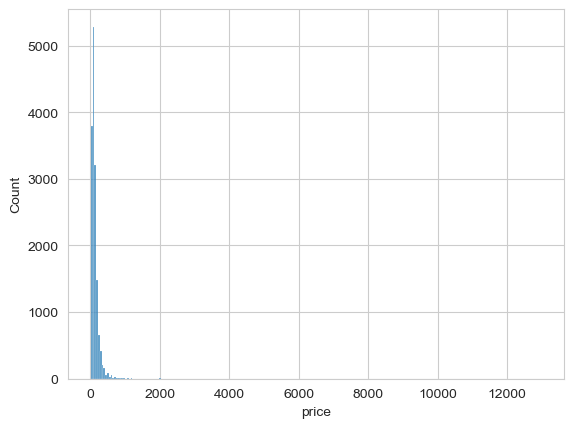

In [222]:
sns.histplot(df_explore['price'])

As expected, values cluster around zero and we have some extreme outliers in the high thousands. We should transform this variable for exploration by taking its logarithm. 

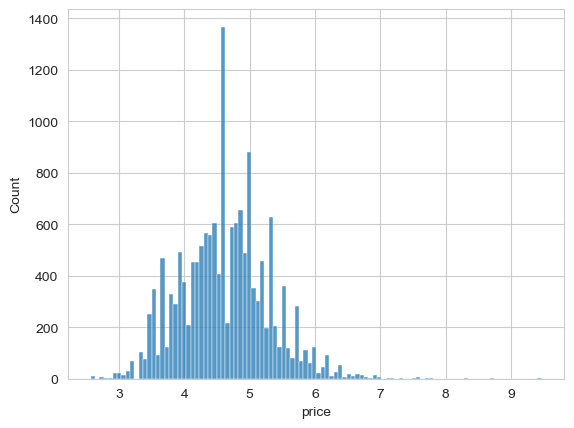

In [223]:
sns.histplot(np.log(df_explore['price']))
df_explore['log_price'] = np.log(df_explore['price'])

## Independent variables

- **Continuous**: `latitude`, `longitude`, `rating`, `accuracy`, `cleanliness`, `checkin`, `communication`, `location`, `value`, `reviews_per_month`<br><br>

- **Discrete**: `host_listings_count`, `accomodates`, `bathrooms`, `bedrooms`, `beds`, `guests_included`, `min_nights`, `max_nights`, `availability_365`, `number_of_reviews`

We can again use the `seaborn` `distplot` to examine each of these distributions individually, or we can write a bit of code to lay out all of the distributions in a grid. We can also take advantage of the `pandas` plotting function `DataFrame.hist()` to create a grid view.

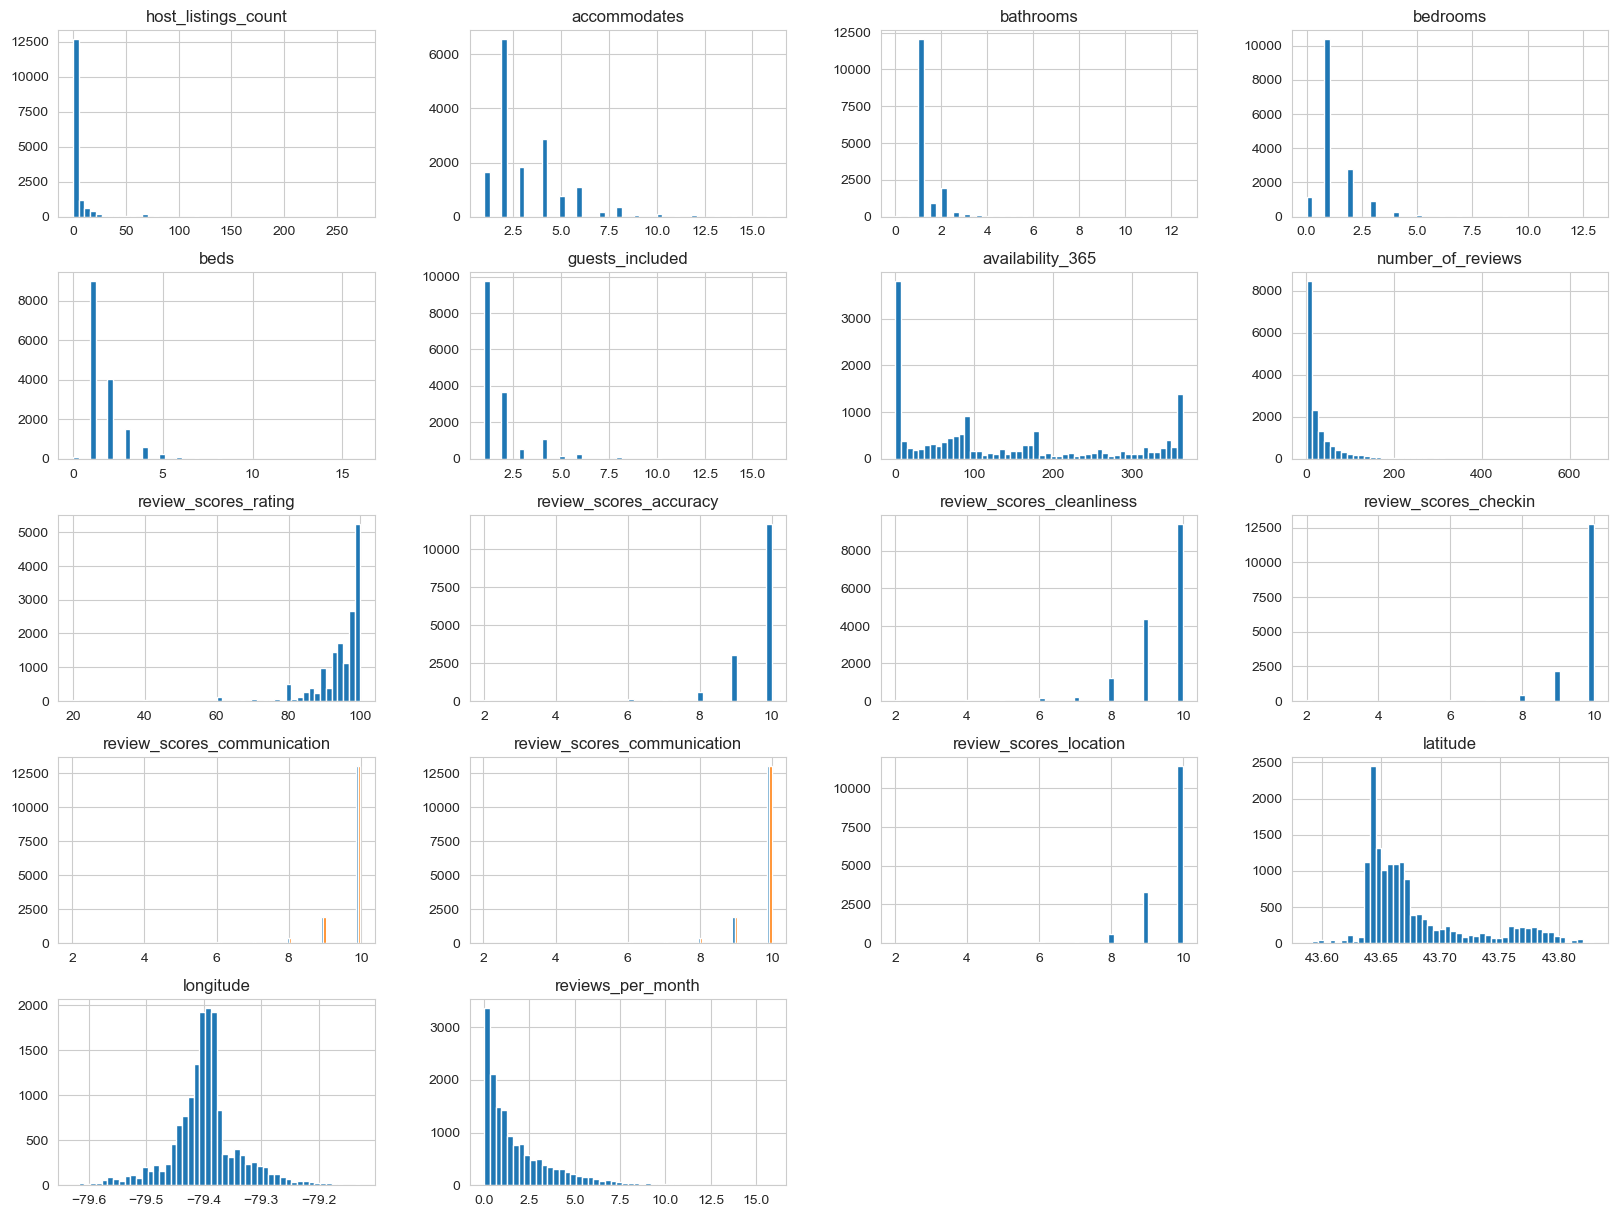

In [224]:
# we use the .hist() pandas function here for the more compact view
# we can accomplish the same with plt.subplots, sns.distplot() and a few extra lines of code
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

Our data has many different characteristics: it is not normally distributed, and it is sometimes continuous and sometimes discrete. For the discrete data (`reviews_per_month`) we can log transform just like we did with `price`.

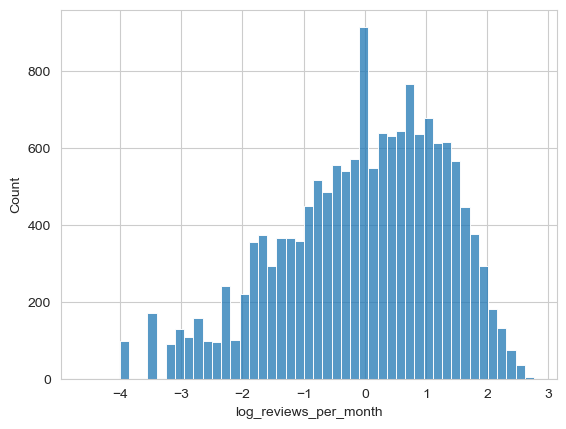

In [225]:
df_explore['log_reviews_per_month'] = df_explore['reviews_per_month'].apply(np.log)
sns.histplot(df_explore['log_reviews_per_month'].dropna())
plt.show()
continuous_vars[2] = 'log_reviews_per_month'

This looks a little better, but we should keep the skew in mind as we build our models.

## Qualitative features
As with our quantitative features, we should take a look at our qualitative features. Getting an idea of what values are in each category will be important in Part 2, when we will have to encode these variables numerically. We can use `Series.value_counts()` to get a concise summary, but since this is a `Series` operator, we will have to look at our variables one at a time.

## EXERCISE 3: Printing categorical variables

Write a simple for loop that prints out the values for each categorical variable using `Series.value_counts()`.

In [255]:
for item in categorical_vars:
    print(df_explore[item].value_counts())
    print()

host_is_superhost
f    10657
t     4906
Name: count, dtype: int64

host_has_profile_pic
t    15534
f       29
Name: count, dtype: int64

host_identity_verified
f    9543
t    6020
Name: count, dtype: int64

is_location_exact
t    12808
f     2755
Name: count, dtype: int64

property_type
Apartment             4830
House                 4089
Condominium           3881
Townhouse              809
Guest suite            629
Bungalow               464
Loft                   368
Serviced apartment     172
Guesthouse              92
Bed and breakfast       66
Other                   58
Villa                   55
Boutique hotel          30
Hostel                  20
Name: count, dtype: int64

room_type
Entire home/apt    10312
Private room        5035
Shared room          216
Name: count, dtype: int64

bed_type
Real Bed         15339
Futon              108
Pull-out Sofa       72
Airbed              26
Couch               18
Name: count, dtype: int64

instant_bookable
f    9684
t    5879
Name: c

It is clear that the `property_type` and `amenities` categories are a little messy in their raw form. For `property_type`, we can combine some of the less common values into a broader "other" bucket to make exploration easier.

In [249]:
others = [x for x in df_explore['property_type'].value_counts().index if df_explore['property_type'].value_counts()[x] <= 10]
others

[]

In [250]:
df_explore['property_type'] = df_explore['property_type'].apply(lambda x: 'Other' if x in others else x)
df_explore['property_type'].value_counts()

property_type
Apartment             4830
House                 4089
Condominium           3881
Townhouse              809
Guest suite            629
Bungalow               464
Loft                   368
Serviced apartment     172
Guesthouse              92
Bed and breakfast       66
Other                   58
Villa                   55
Boutique hotel          30
Hostel                  20
Name: count, dtype: int64

The `amenities` are going to be a bit trickier to handle, as they are not stored in a format easily read by Python. For now, we will use some Python string tricks to get a quick count of each amenity.

In [251]:
df_explore['amenities'].head(1)
all_amenities = ','.join(df_explore['amenities'])
all_amenities = re.sub('{', '', all_amenities)
all_amenities = re.sub('}', '', all_amenities)
all_amenities = re.sub('\"', '', all_amenities)
all_amenities = all_amenities.split(',')

In [252]:
for item in set(all_amenities):
    print(item, all_amenities.count(item))

Self check-in 6031
Step-free access 4683
 16
Elevator 6491
Terrace 36
Safety card 2467
TV 11195
Alfresco bathtub 2
Handheld shower head 386
Coffee maker 5398
Standing valet 3
Sauna 7
Beach essentials 72
Fire extinguisher 8168
Stand alone steam shower 6
Baby bath 149
Wide doorway 2195
Waterfront 453
Bed linens 6026
En suite bathroom 53
Table corner guards 33
HBO GO 15
Hot water 10052
Double oven 5
Cleaning before checkout 664
Toilet paper 222
Beach view 5
Lock on bedroom door 4486
First aid kit 6072
Smoke detector 14716
translation missing: en.hosting_amenity_49 2196
translation missing: en.hosting_amenity_50 2776
Free parking on premises 6248
Body soap 222
Soaking tub 41
Printer 16
Mountain view 4
Carbon monoxide detector 12384
Shower chair 27
Dishwasher 4345
Gas oven 29
Extra pillows and blankets 4508
Sound system 44
Shared hot tub 7
Hammock 1
Exercise equipment 23
Heating 15149
Accessible-height toilet 494
Baby monitor 55
Other pet(s) 41
Fax machine 1
24-hour check-in 1960
Walk-in sh

Evidently there is a lot of variety in this section. For the purposes of our machine learning model, we will leave amenities out. However, interested students may wish to build on the models by writing some code to incorporate amenities as a feature (see Part 2 of this module). As a simple example, it may be interesting to create new columns using `df_explore` for some of the more common amenities.

In [253]:
df_explore['amenities'].str.contains('Self check-in')

id
1419        False
8077        False
23691        True
26654        True
27423       False
            ...  
31333493    False
31358984    False
31373997    False
31446470    False
31468108     True
Name: amenities, Length: 15563, dtype: bool

If we reflect back on the problem identified at the start of the module, we can identify some values that will not be applicable. The different review scores are all determined after a property has been used on AirBnB, not to mention the heavy skew towards high values. For the purpose of setting up a new AirBnB they should probably be ignored.

In [254]:
review_vars = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
'review_scores_communication', 'review_scores_location', 'reviews_per_month']

df_explore = df_explore.drop(review_vars, axis=1)

discrete_vars = [x for x in discrete_vars if x not in review_vars]
continuous_vars = [x for x in continuous_vars if x not in review_vars]

KeyError: "['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_communication', 'review_scores_location', 'reviews_per_month'] not found in axis"

# Correlation Analysis

Now is a good time to take a preliminary look at which features may help us predict the rental price. We can look at basic correlations with `DataFrame.corr()` and select the correlations with `log_price`. We will use the default Pearson correlation coefficient.

In [233]:
corr_matrix = df_explore.loc[:, ['log_price'] + continuous_vars].corr(method='pearson')
corr_matrix['log_price'].sort_values(ascending=False)

log_price                1.000000
log_reviews_per_month    0.014382
longitude               -0.009308
latitude                -0.363228
Name: log_price, dtype: float64

In [234]:
corr_matrix = df_explore.loc[:, ['log_price'] + discrete_vars].corr(method='pearson')
corr_matrix['log_price'].sort_values(ascending=False)

log_price              1.000000
accommodates           0.584884
beds                   0.478438
bedrooms               0.472005
guests_included        0.395181
bathrooms              0.339764
host_listings_count    0.034351
availability_365       0.025884
Name: log_price, dtype: float64

Take note of the features that are good predictors of price. Unsurprisingly, AirBnB's for more people tend to go for higher prices. Below we can use Seaborn's `pairplot` to look at these relationships visually.

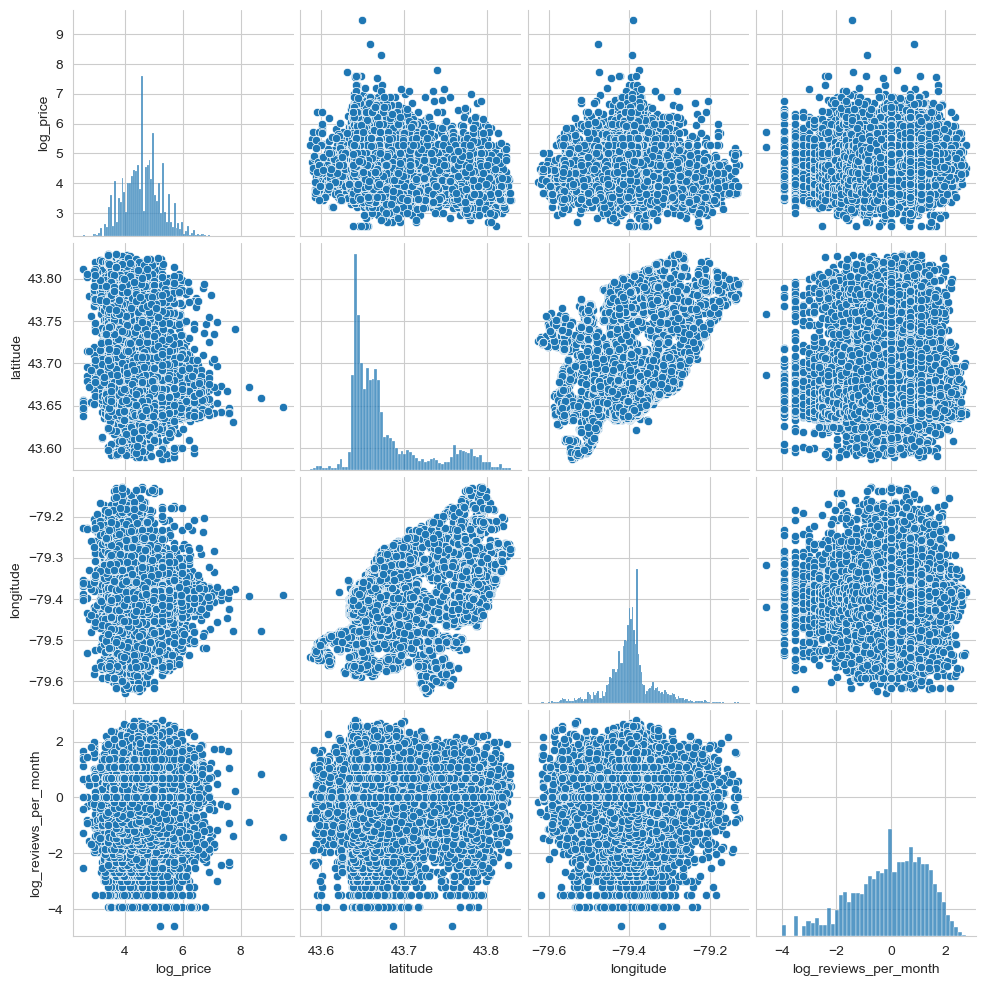

In [235]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + continuous_vars])
plt.show()

There are no major patterns in the continuous variables, although we can begin to see some clusters of high-price rentals at certain longitudes and latitudes.

Next, we'll look at discrete variables.

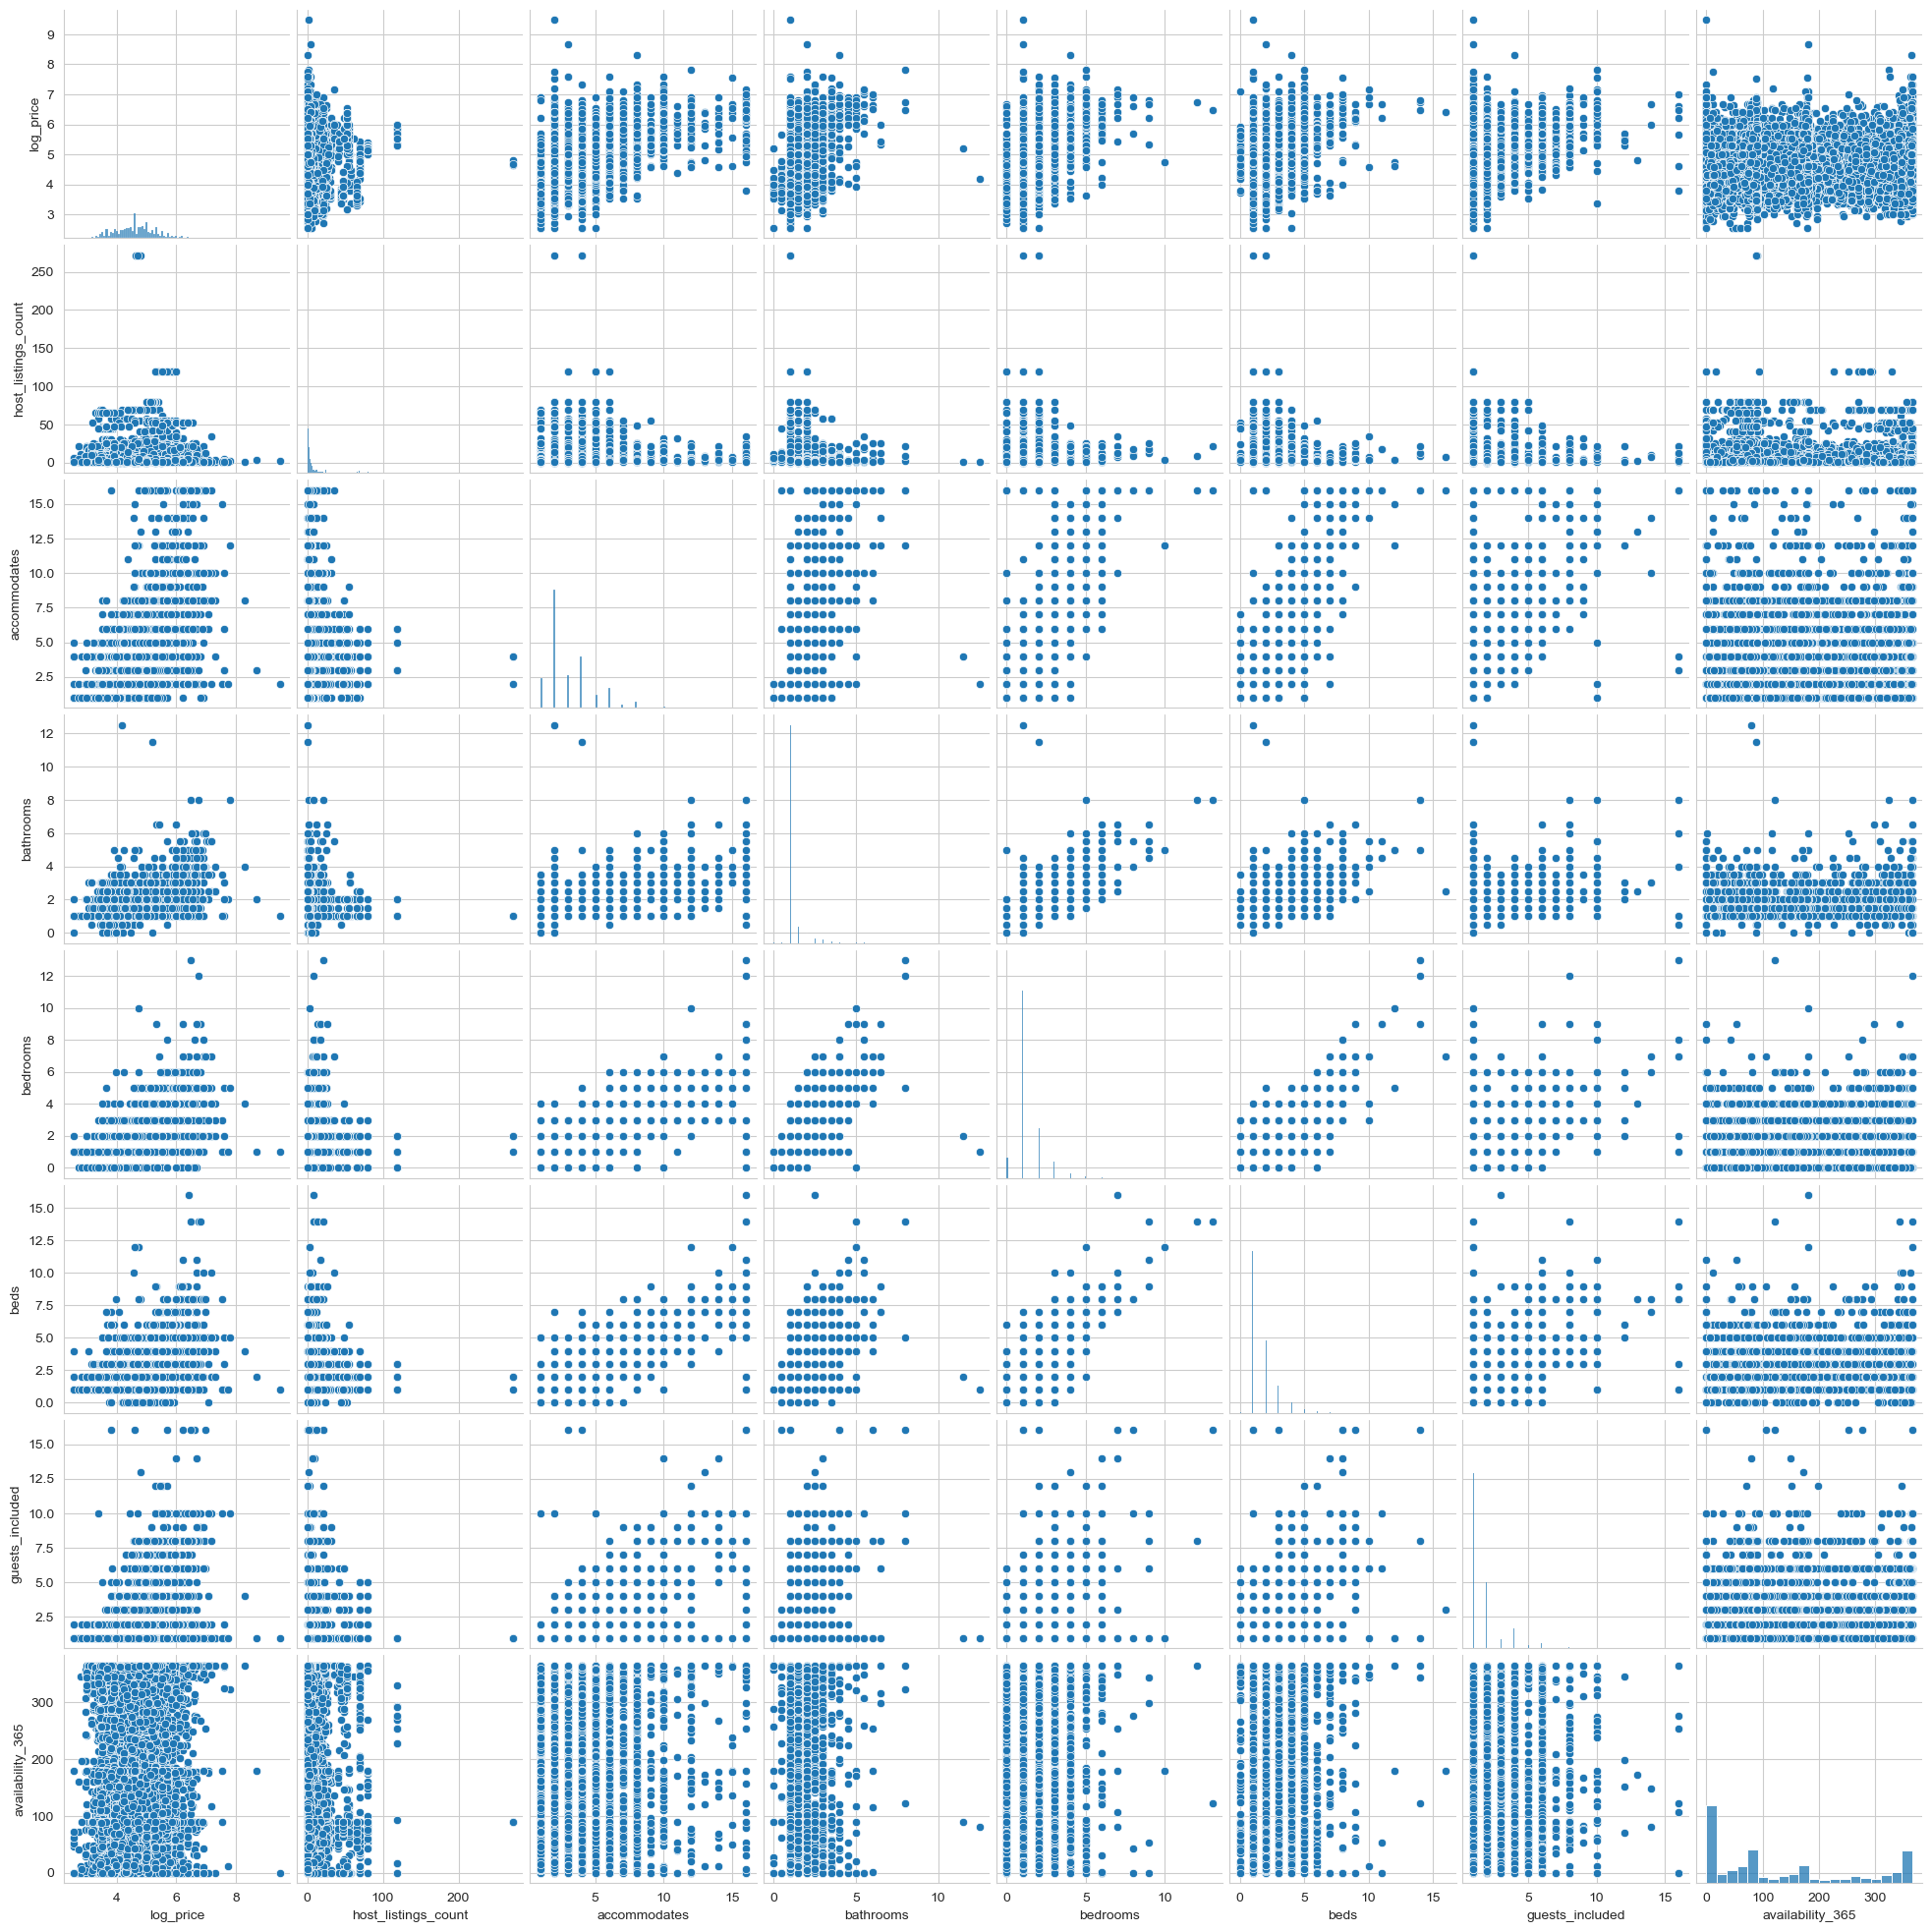

In [236]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + discrete_vars])
plt.show()

Here we can begin to see some clear patterns, particularly with higher price AirBnB's accommodating more people.

For categorical variables we will again visualize the differences, this time with boxplots. If you are interested in quantifying the effect of different features, you can add a t-test or analysis of variance (ANOVA). 

## My Investigation on Box Plot

Total Record = 15563
Min = 2.5649493574615367
Q1 = 4.174387269895637
Median = 4.605170185988092
Q3 = 5.0106352940962555
Max = 9.472781556562168


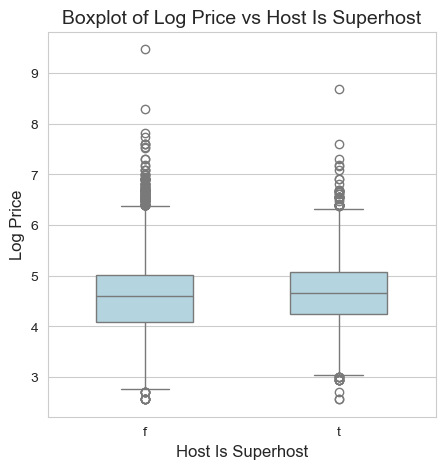

In [237]:
df_superhost = df_explore[(df_explore['host_is_superhost']=='t') | (df_explore['host_is_superhost']=='f')]
print('Total Record = '+str(df_superhost.shape[0]))
print('Min = '+str(df_superhost['log_price'].min()))
print('Q1 = '+str(df_superhost['log_price'].quantile(0.25)))
print('Median = '+str(df_superhost['log_price'].median()))
print('Q3 = '+str(df_superhost['log_price'].quantile(0.75)))
print('Max = '+str(df_superhost['log_price'].max()))
max_log_price = df_superhost['log_price'].max()

sns.set_style("whitegrid")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for item in [x for x in categorical_vars if x == 'host_is_superhost']:
#    if item == 'amenities':
#        next    
    ay, ax = plt.subplots(figsize=(5,5))
    col_name = item.replace('_', ' ').title()
    plt.title('Boxplot of Log Price vs '+col_name, fontsize=14)
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel('Log Price', fontsize=12)
    #plt.ylim([0,max_log_price+1])
    #ay.text(0.32, 0.55, f'Max Log Price: {max_log_price:.2f}', horizontalalignment='center', color='red', fontsize=10, bbox=props)
    sns.boxplot(x=item, y='log_price', data=df_superhost, orient='v', color='lightblue', ax=ax, width=0.5)
    if len(df_superhost[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

### Original Code

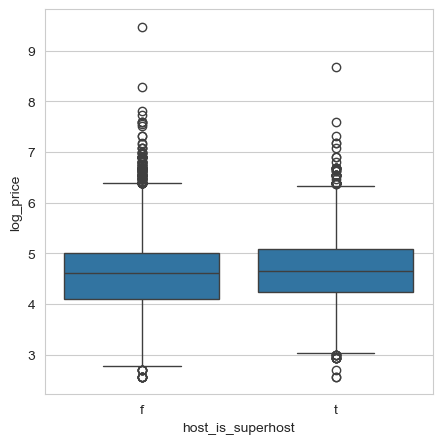

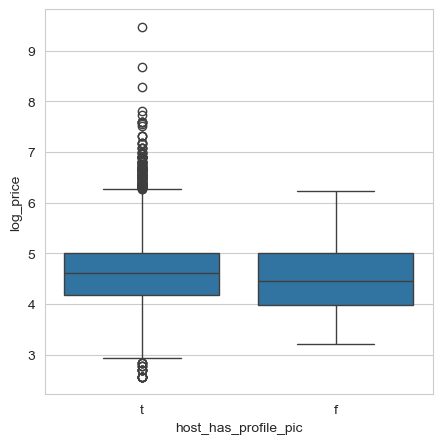

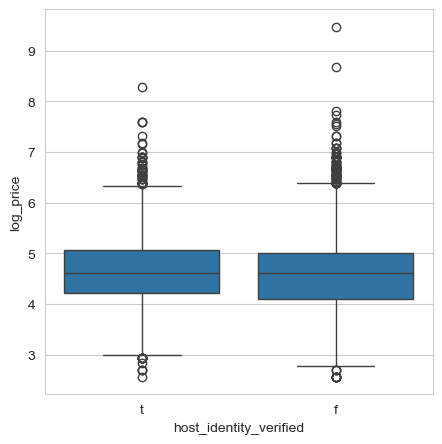

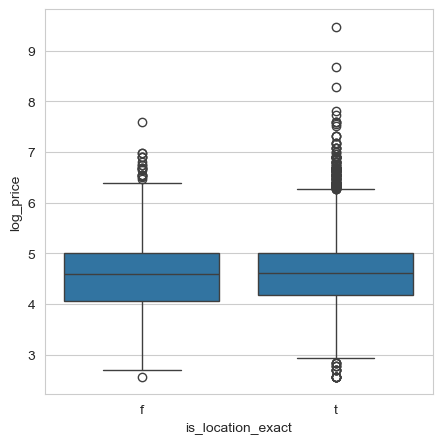

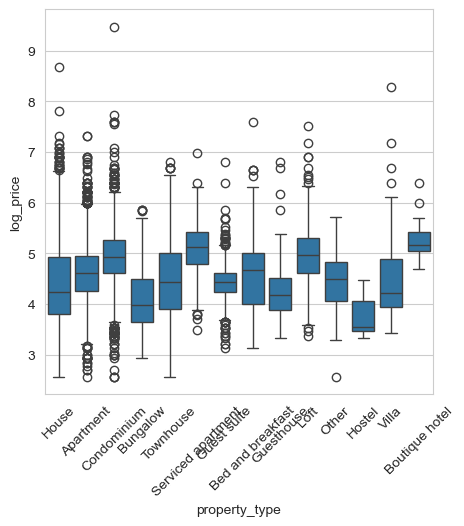

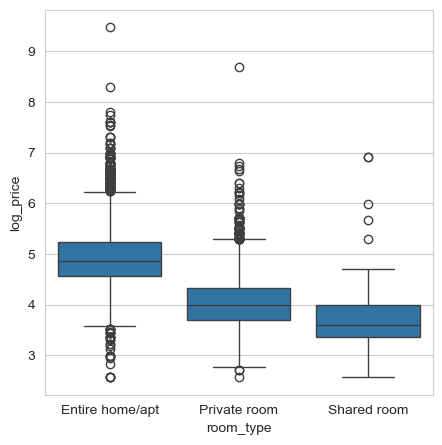

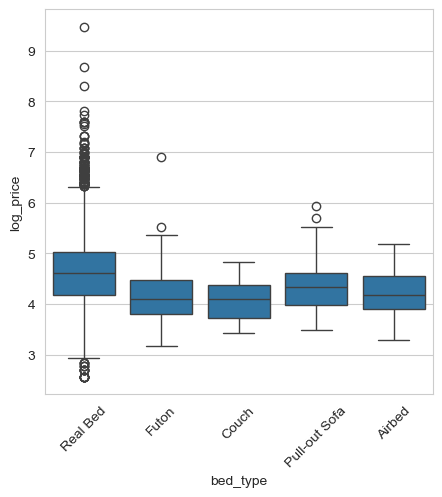

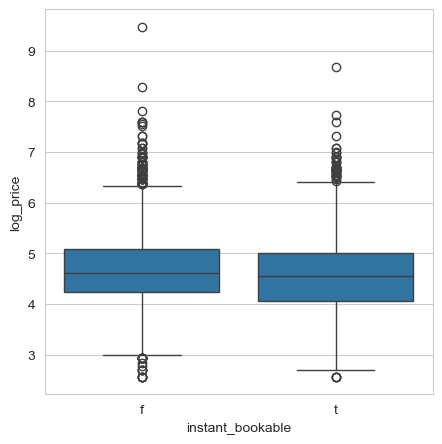

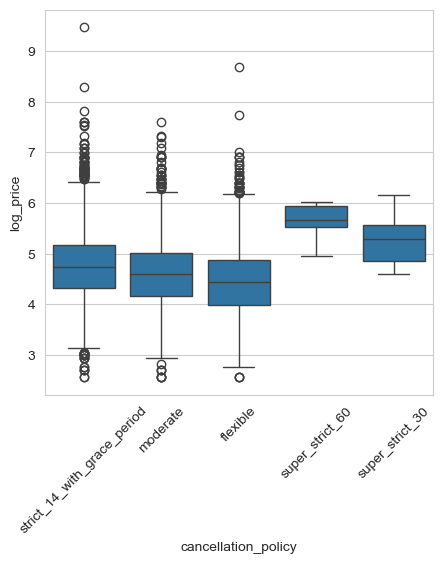

In [238]:
for item in [x for x in categorical_vars if x != 'amenities']:
#    if item == 'amenities':
#        next
    plt.figure(figsize=(5,5))
    sns.boxplot(x=item, y='log_price', data=df_explore)
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

The categorical graphs show some other qualities correlating with high price, including privacy, bed quality, and cancellation policy.

Finally, let's plot `log_price` geographically using the `latitude` and `longitude` features. We should see a nice scatterplot in the shape of Toronto as the result. This visualization is also helpful to show that there is not a clear linear relationship between price and position. However, there may be some non-linear features that could inform our choice of model in Part 2.

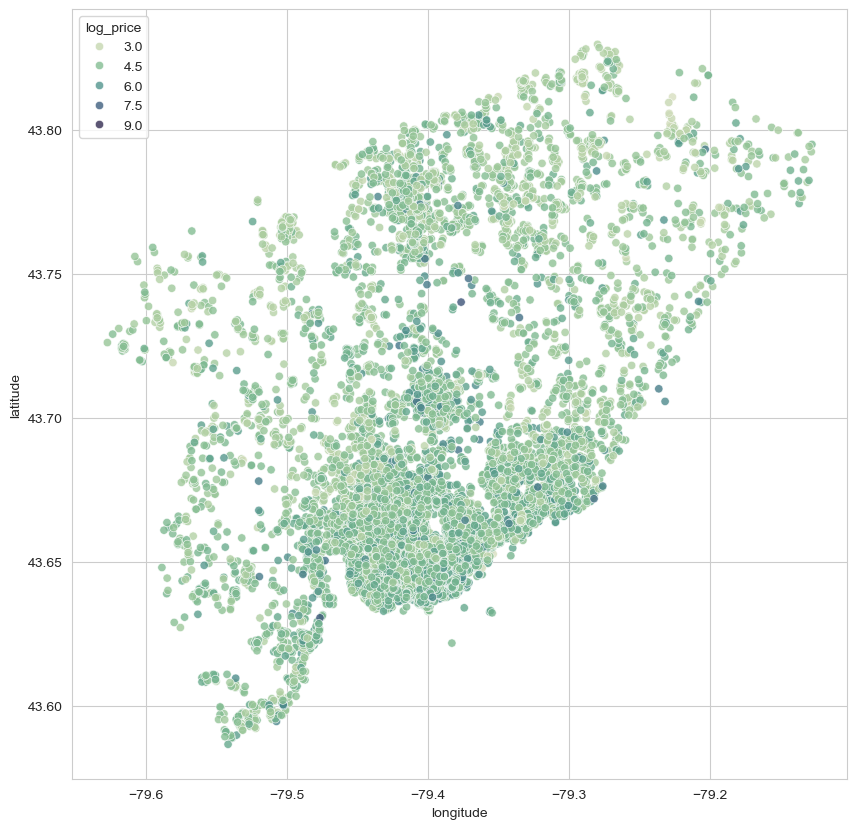

In [239]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', data=df_explore, palette=cmap, alpha=0.8)
plt.show()

**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# Exercise Solutions

## EXERCISE 1

1. How can we frame the above question as null and alternative hypotheses?

    - **Null**: The price of an AirBnB listing cannot be predicted from its existing attributes/features.<br><br>

    - **Alternative**: The price of an AirBnB listing can be predicted from its existing attributes/features.<br><br>

2. Will this be a supervised or unsupervised machine learning problem? Hint: Take a peek at the data summaries under the "Features (variable names and data types)" section below to answer this question.

    - Supervised, as our data includes price labels for each listing.<br><br>

3. What type of model should we use?

    - Regression, as we are predicting a continuous dependent variable (price).

## EXERCISE 2

In [240]:
[(x, y) for x, y in zip(df_explore.isna().sum(), df_explore.isna().sum().index) if x > 0]

[]

## EXERCISE 3

In [241]:
for item in categorical_vars:
    print(df_explore[item].value_counts())
    print()

host_is_superhost
f    10657
t     4906
Name: count, dtype: int64

host_has_profile_pic
t    15534
f       29
Name: count, dtype: int64

host_identity_verified
f    9543
t    6020
Name: count, dtype: int64

is_location_exact
t    12808
f     2755
Name: count, dtype: int64

property_type
Apartment             4830
House                 4089
Condominium           3881
Townhouse              809
Guest suite            629
Bungalow               464
Loft                   368
Serviced apartment     172
Guesthouse              92
Bed and breakfast       66
Other                   58
Villa                   55
Boutique hotel          30
Hostel                  20
Name: count, dtype: int64

room_type
Entire home/apt    10312
Private room        5035
Shared room          216
Name: count, dtype: int64

bed_type
Real Bed         15339
Futon              108
Pull-out Sofa       72
Airbed              26
Couch               18
Name: count, dtype: int64

instant_bookable
f    9684
t    5879
Name: c

# References

AirBnB. (2019). Detailed Listings data for Toronto, January 2019. Retrieved from http://insideairbnb.com/get-the-data.html.